<a href="https://colab.research.google.com/github/dennismathewjose/Data-Mining-IE7275/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

**Before you start:** Read Chapter 3 Data Visualization and Chapter 4 Dimension Reduction in the textbook.

**Note:** Please make sure your plots are complete and presentable with a title, proper axis names, labels and legends if applicable.

Please enter the code along with your comments in the **TODO** sections.

Please refer to the **Hint** section if you do not know where to start.

Alternative solutions are welcomed.

## Part 1: Advanced Data Visualization

### Problem 1 ##

**Dataset:** [Mismanaged waste](https://ourworldindata.org/grapher/mismanaged-plastic-waste?tab=chart&time=earliest..latest)

**Introduction:** Jambeck et al. quantified municipal and plastic waste streams from coastal populations in 2010 with projections to the year 2025. The authors define mismanaged and inadequately managed waste as follows: "mismanaged waste is material that is either littered or inadequately disposed. Inadequately disposed waste is not formally managed and includes disposal in dumps or open, uncontrolled landfills, where it is not fully contained. Mismanaged waste could eventually enter the ocean via inland waterways,
wastewater outflows, and transport by wind or tides. "

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install --upgrade openpyxl

In [2]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("mismanaged-waste-global-total.csv")
df.head()

Saving mismanaged-waste-global-total.csv to mismanaged-waste-global-total.csv


,Entity,Code,Year,Mismanaged waste (% global total) (% of global total)
0,Albania,ALB,2010,0.0933
1,Algeria,DZA,2010,1.6347
2,Angola,AGO,2010,0.1964
3,Anguilla,AIA,2010,0.0002
4,Antigua and Barbuda,ATG,2010,0.0039


**TODO1:**

*  Use a choropleth map to present the amount of mismanaged waste by country *(Highlight only the top 5 countries)*
*   The label (hover) should include the country name and percentage of mismanaged waste
*  Interpret your key findings from the map graph
*  Considering the manufacturing volume of each country, is this graph misleading?

In [8]:
# Sort the data by mismanaged waste percentage and select the top 5 countries
df_sorted = df.sort_values(by='Mismanaged waste (% global total) (% of global total)', ascending=False)
top_5_countries = df_sorted.head(5)

#creating a choropleth map
fig = px.choropleth(
    top_5_countries,
    locations="Code",  #Country codes
    color="Mismanaged waste (% global total) (% of global total)",  # Data for coloring
    hover_name="Entity",  # Country name to display on hover
    hover_data={"Mismanaged waste (% global total) (% of global total)": ":.2f"},  # Format percentage
    title="Top 5 Countries with the Highest Mismanaged Waste (% of Global Total)",
    labels={"Mismanaged waste (% global total) (% of global total)": "Mismanaged Waste (%)"},
    color_continuous_scale=px.colors.sequential.Plasma
)
# Update layout for better visualization
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))

# Show the map
fig.show()
print(top_5_countries)

          Entity Code  Year  \
28         China  CHN  2010   
80     Indonesia  IDN  2010   
134  Philippines  PHL  2010   
184      Vietnam  VNM  2010   
161    Sri Lanka  LKA  2010   

     Mismanaged waste (% global total) (% of global total)  
28                                             27.6966      
80                                             10.1019      
134                                             5.9153      
184                                             5.7588      
161                                             4.9968      


### Key Findings from the Map

- Top 5 Countries: The map highlights the top 5 countries with the highest percentage of mismanaged waste relative to the global total (China, Indonesia, Philipines, Vietnam and Sri Lanka).

- Geographical Distribution: The countries may be concentrated in specific regions (e.g. Asia), indicating potential regional trends in waste management challenges.

- Waste Management Issues: High percentages of mismanaged waste suggest inadequate waste management infrastructure, policies, or public awareness in these countries, the number of population.

### Address Potential Misleading Aspects
- Manufacturing Volume: The graph shows the percentage of mismanaged waste relative to the global total, not the absolute volume. A country with a high percentage might not necessarily produce the most waste in absolute terms. For example:

  - A small country with poor waste management might have a high percentage of mismanaged waste but a low absolute contribution to global waste.

  - A large manufacturing country (e.g., China, USA) might have a lower percentage but a much higher absolute volume of mismanaged waste. But in this case as per the hypothesis of a large manufacturing country like China have a large absolute volume of mismanaged waste as well.

- Misleading Interpretation: Without considering absolute waste volumes, the graph might overemphasize smaller countries with poor waste management while underrepresenting larger countries with significant waste production.


**Hint:**

* The variable "code" contains [three letters ISO country codes](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3).
* [Use the built-in country code to create a choropleth map.](https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries)



### Problem 2 ##

**Dataset:** [Plastic disposal dataset](https://ourworldindata.org/plastic-pollution)

**Information:** Plastic disposal dataset methods shows how has global plastic waste disposal method changed over time. In the chart we see the share of global plastic waste that is discarded, recycled or incinerated from 1980 through to 2015.


In [9]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("activity.xlsx")
df.head()

Saving activity.xlsx to activity.xlsx


,year,Value,Type
0,1960,88.1,Generation
1,1960,NaN,Composting*
2,1960,5.6,Recycling
3,1960,0.0,Combustion with energy recovery
4,1960,82.5,Landfilling and other disposal


**TODO1:**
*  Use an animated bar chart to indicate the change of trash disposal method through the years
*  Interpret your key findings from the graph


In [11]:
#Step 1: Ensure the data is sorted by year for proper animation
df = df.sort_values(by='year')

#Step 2: Create the animated bar chart
fig = px.bar(
    df,
    x="Type",  # Trash disposal method
    y="Value",  # Value of trash disposed
    animation_frame="year",  # Animate by year
    range_y=[0, df['Value'].max() + 10],  # Set y-axis range
    title="Change in Trash Disposal Methods Over the Years",
    labels={"Value": "Amount of Trash Disposed", "Type": "Disposal Method"},
    color="Type",  # Color by disposal method
    text="Value"  # Display values on bars
)

#Step 3: Update layout for better visualization
fig.update_layout(
    xaxis_title="Disposal Method",
    yaxis_title="Amount of Trash Disposed",
    showlegend=True
)

#Step 4: Show the animated chart
fig.show()

### Interpretation

#### Shift Toward Sustainable Waste Disposal Methods:
- Over the years, there has been a noticeable shift toward more sustainable waste disposal methods, such as composting and combustion with energy recovery.

- In 1960, these methods were virtually non-existent (with values of 0), but by 2017, they accounted for 27 and 34 units of waste disposal, respectively. This indicates a growing emphasis on environmentally friendly waste management practices

#### Increase in Landfilling Due to Rising Waste Generation:
- Despite the adoption of sustainable methods, landfilling remains a significant disposal method, and its usage has increased over the years.

- This rise can be attributed to the growing volume of waste generated globally, coupled with inadequate infrastructure to handle waste through alternative methods. Landfilling continues to be a default option in many regions due to its cost-effectiveness and simplicity.

#### Significant Growth in Recycling Efforts:
- Recycling has seen a remarkable increase over the years, particularly between 1990 and 2000, where there was a sharp rise in the amount of waste being recycled.

- This growth reflects increased public awareness, government policies promoting recycling, and advancements in recycling technologies. Recycling has become a key component of modern waste management strategies, helping to reduce the environmental impact of waste

**Hint:** [Animated Bar Charts with Plotly Express](https://plotly.com/python/animations/#animated-bar-charts-with-plotly-express)




**TODO2:**
*  Suggest and show a better way to visualize the  data (choose the most approporiate visualization for this use case)

### Better way to visualize the data
- For visualizing the change in trash disposal methods over the years, a  stacked area chart or a line chart would be more effective than a standard animated bar chart. This visualization can better represent the composition of waste disposal methods and their relative contributions over time.

In [14]:
# Creating the stacked area chart
fig = px.area(
    df,
    x="year",  # Year on x-axis
    y="Value",  # Amount of waste disposed (Y - axis)
    color="Type",  # Different colors for each disposal method
    title="Change in Trash Disposal Methods Over the Years (Stacked Area Chart)",
    labels={"Value": "Amount of Trash Disposed", "year": "Year", "Type": "Disposal Method"},
    line_shape="linear"  #Smooth lines for better visualization
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Amount of Trash Disposed",
    showlegend=True,
    xaxis=dict(tickmode='linear', dtick=5)  # Adjust x-axis ticks
)

# Show the chart
fig.show()

### Advantages
-  Clearly shows the total waste disposed and the proportion of each method over time.

- Highlights trends in individual methods and their cumulative impact.

- Easy to interpret relative growth or decline of each method.

### Problem 3 ##

**Dataset:** [Global Fortune 500](https://www.kaggle.com/edgarhuichen/fortune-global-500)

**Introduction:** Fortune Global 500 List is a list of largest corporations worldwide which are measured by their total fiscal year revenues. Companies rankings sorted by total revenues for their respective fiscal years ended on or before March 31 of the relevant year.

In [16]:
#Upgrade the package "plotly" before you start to avoid future syntax error
#You only need to upgrade it once
!pip install plotly --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 86.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [1]:
#Import packages
import pandas as pd
import numpy as np
import plotly.express as px

#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Global Fortune 500.csv")
df.head()

Saving Global Fortune 500.csv to Global Fortune 500.csv


,Rank,Company Name,Country,Number of Employees,Previous Rank,Revenues($millions),Revenue Change,Profits($millions),Profit Change,Assets($millions),Unnamed: 10,Unnamed: 11
0,1,Walmart,USA,"2,300,000",1,485873,0.80%,13643,-7.20%,198825,NaN,NaN
1,2,State Grid,China,"926,067",2,315199,-4.40%,9571.3,-6.20%,489838,NaN,NaN
2,3,Sinopec Group,China,"713,288",4,267518,-9.10%,1257.9,-65.00%,310726,NaN,NaN
3,4,China National Petroleum,China,"1,512,048",3,262573,-12.30%,1867.5,-73.70%,585619,NaN,NaN
4,5,Toyota Motor,Japan,"364,445",8,254694,7.70%,16899.3,-12.30%,437575,NaN,NaN


**TODO1:**
*  Build a treemap of the companies with "country" as the first hierarchy and "company" as the second hierarchy (Only show top 5 businesses for each country)
*  The size of each block should indicate the corresponding company's revenue
*  Interpret your key findings from the treemap

In [5]:
#Step 1: Convert 'Revenues($millions)' to numeric (if necessary)
df['Revenues($millions)'] = pd.to_numeric(df['Revenues($millions)'], errors='coerce')

#Step 2: Group by country and select top 5 companies by revenue for each country
top_5_by_country = df.groupby('Country').apply(lambda x: x.nlargest(5, 'Revenues($millions)')).reset_index(drop=True)
top_5_by_country

#Step 3: Building a tree map
# Create the treemap
fig = px.treemap(
    top_5_by_country,
    path=['Country', 'Company Name'],  # Hierarchy: Country -> Company
    values='Revenues($millions)',     # Size of blocks based on revenue
    title='Top 5 Companies by Revenue in Each Country (Treemap)',
    labels={'Revenues($millions)': 'Revenue ($ millions)'},
    color='Revenues($millions)',      # Color by revenue
    color_continuous_scale='Blues'    # Color scale
)

# Update layout for better visualization
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Show the treemap
fig.show()

<ipython-input-5-7062d4898fa2>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



### Interpretation

#### Dominant Countries
  ##### - United States:

  - The United States dominates the global market with a total revenue of $311,604 million from its top companies.

  - The leading contributors are Walmart, Berkshire Hathaway, Exxon Mobil, and Apple, with Walmart being the largest contributor. This reflects the strength of the retail, technology, and energy sectors in the U.S. economy.

##### -China:

- China ranks second with a total revenue of $248,403 million.

- The top contributors are State Grid (the largest contributor), Sinopec Group, and China National Petroleum, highlighting the dominance of the energy and utilities sector in China.

##### Germany:

- Germany also features prominently, with companies like Volkswagen and Daimler leading the way. This underscores the importance of the automotive industry in the German economy.

Global Economic Power:

- The dominance of the United States, China, and Germany in the treemap reflects their economic power and the presence of large multinational corporations that drive global markets.

#### Top Companies
##### United States:

- Walmart stands out as the largest contributor to revenue, followed by Amazon and Apple. This highlights the significance of the retail and technology sectors in the U.S. economy.

##### China:

- State Grid is the top revenue generator, followed by Sinopec Group and China National Petroleum, emphasizing the critical role of the energy sector in China.

#####Germany:

- Volkswagen and Daimler are the leading companies, showcasing the strength of the automotive industry in Germany.

#### Revenue Distribution

##### Concentration of Revenue:

- In many countries, a few dominant companies contribute the majority of the revenue. For example:

  - In the United States, Walmart alone accounts for a significant portion of the total revenue.

  - In China, State Grid dominates the revenue distribution.

This concentration indicates that these companies play a pivotal role in their respective economies.

Even Distribution:

- Some countries may show a more even distribution of revenue across their top companies, suggesting a diverse economic landscape with multiple strong players.

**Hint:** [Build a treemap with Plotly](https://plotly.com/python/treemaps/)




**If you are interested (this part is not graded):**
*  Use the zooming and panning function to offer the users an option to zoom in any target country for a detailed analysis



In [12]:
# Create the treemap with zoom and pan enabled
fig = px.treemap(
    top_5_by_country,
    path=['Country', 'Company Name'],  # Hierarchy: Country -> Company
    values='Revenues($millions)',     # Size of blocks based on revenue
    title='Top 5 Companies by Revenue in Each Country (Treemap) - Zoom and Pan Enabled',
    labels={'Revenues($millions)': 'Revenue ($ millions)'},
    color='Revenues($millions)',      # Color by revenue
    color_continuous_scale='Blues',   # Color scale
    hover_data={'Revenues($millions)': ':.2f'},  # Format hover data
)

#Update layout for better interactivity
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    hovermode='closest',  # Improve hover interaction
)

# Enable zooming and panning
fig.update_traces(
    marker=dict(cornerradius=5),  # Rounded corners for better aesthetics
    hovertemplate='<b>%{label}</b><br>Revenue: %{value:.2f}M<extra></extra>',  # Custom hover template
)

# Show the treemap
fig.show()

### Problem 4 ##

**Dataset:** [Air Quality](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

**Introduction:** The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

In [6]:
#Import required libraries
import scipy.stats as stats
from sklearn import preprocessing
%matplotlib inline
import pandas as pd # Import the pandas library and alias it as pd
import numpy as np # Import numpy and alias it as np


#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("Air Quality.xlsx")
df.head()

Saving Air Quality.xlsx to Air Quality.xlsx


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


**TODO1:**
*  Plot a correlation heatmap for the Air Quality dataset
*  Interpret your key findings from the correlation heatmap (value of correlation should be displayed in the heatmap)

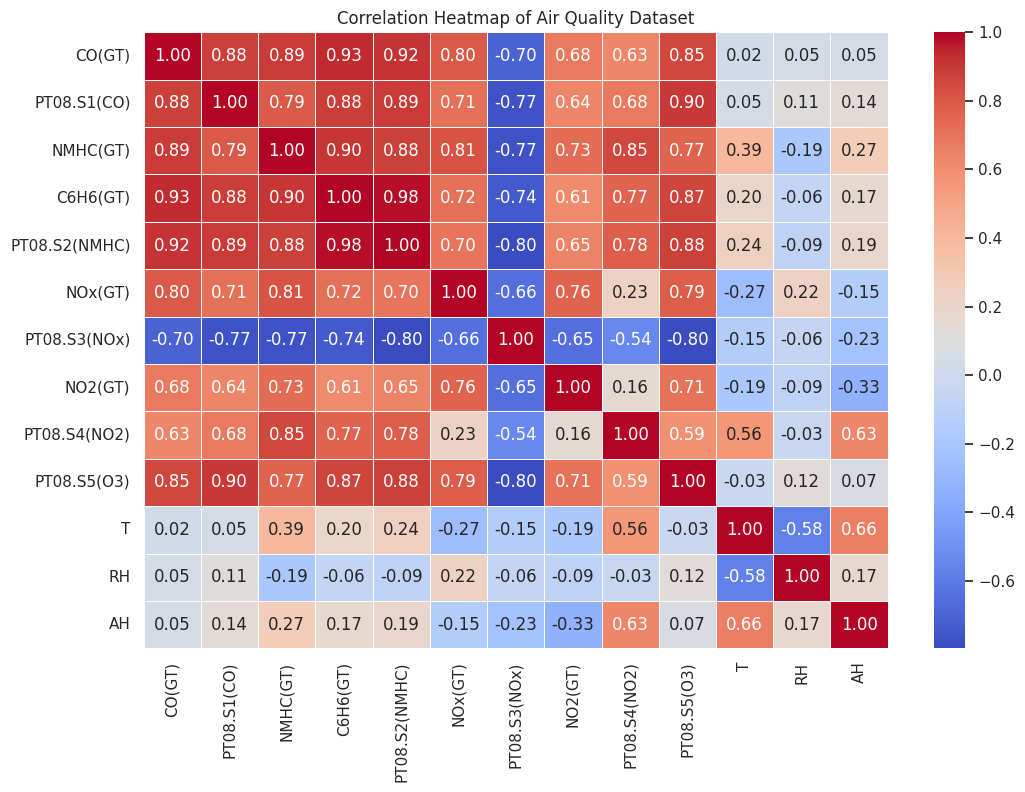

In [7]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot and alias it as plt
import seaborn as sns # Import seaborn and alias it as sns
sns.set()
# Replace missing values (-200) with NaN for better analysis
df.replace(-200, np.nan, inplace=True)

# Computing the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Air Quality Dataset")
plt.show()

### Interpretation
CO, NOx, and NO2 show a strong positive correlation with each other. This is expected since these pollutants are commonly emitted together from combustion sources like traffic and industrial emissions.

Some readings may show negative correlations with certain pollutants, which could be indicative of sensor cross-sensitivity or environmental factors.

Some sensor readings may not have a strong correlation with certain gases, indicating that they are either less sensitive to those gases or that other environmental factors influence their readings.

**Hint:** [Build a heatmap with Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Part 2: Dimension Reduction

### Problem 5

**Dataset:** [Wine Classification Dataset](https://archive.ics.uci.edu/ml/datasets/wine)

**Introduction:** These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


In [8]:
#Import the built-in dataset (Wine recognition) for this problem
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
np.set_printoptions(suppress=True, precision=8)

wine = load_wine()
X = pd.DataFrame(wine['data'], columns=wine['feature_names'])
y = wine['target']

In [9]:
X['target'] = y

In [10]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

# X.to_csv('/content/drive/My Drive/wine.csv')

**TODO1:**

*  Calulate the first two principal component scores with eigen values and vectors on the RAW data (without standardization).

*  Note that you are expected to perform matrix multiplication and eigen value calculation **only** with the package Numpy.

In [ ]:
# Compute the covariance matrix
cov_matrix = np.cov(X, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Compute the first two principal components
PC1 = np.dot(X, eigenvectors[:, 0])
PC2 = np.dot(X, eigenvectors[:, 1])

# Store the first two principal component scores
principal_components = pd.DataFrame({
    "PC1 Scores": PC1,
    "PC2 Scores": PC2
})

# Display the first two eigenvalues
eigenvalues_df = pd.DataFrame({
    "Principal Component": ["PC1", "PC2"],
    "Eigenvalue": eigenvalues[:2]
})

# Display the eigenvectors for the first two principal components
eigenvectors_df = pd.DataFrame(
    eigenvectors[:, :2],
    columns=["Eigenvector PC1", "Eigenvector PC2"],
    index=X.columns
)

# Display the results
print("First Two Principal Component Scores:")
print(principal_components.head())

print("\nFirst Two Eigenvalues:")
print(eigenvalues_df)

print("\nEigenvectors of First Two Principal Components:")
print(eigenvectors_df)

First Two Principal Component Scores:
    PC1 Scores  PC2 Scores
0 -1067.054389 -108.520657
1 -1051.588849  -81.663801
2 -1186.552398  -80.491898
3 -1481.731045  -87.223204
4  -736.920383 -105.517139

First Two Eigenvalues:
  Principal Component    Eigenvalue
0                 PC1  99202.030731
1                 PC2    172.536596

Eigenvectors of First Two Principal Components:
                              Eigenvector PC1  Eigenvector PC2
alcohol                             -0.001659        -0.001204
malic_acid                           0.000681        -0.002160
ash                                 -0.000195        -0.004594
alcalinity_of_ash                    0.004671        -0.026461
magnesium                           -0.017868        -0.999340
total_phenols                       -0.000990        -0.000875
flavanoids                          -0.001567         0.000059
nonflavanoid_phenols                 0.000123         0.001354
proanthocyanins                     -0.000601       

**Hint:** [Eigen value calculation with Numpy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

**TODO2:**

*  Use the function PCA() on the RAW data to calculate the priciple components
*  For each principle component, what is the explained variance, proportion variance, and cummulative proportion of variance?
*  Present the first two principal component scores

In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

# Apply PCA on the raw data without standardization
pca = PCA()
principal_components = pca.fit_transform(X)

# Get explained variance, proportion variance, and cumulative variance
explained_variance = pca.explained_variance_
proportion_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(proportion_variance)

# Create a DataFrame to display variance information
variance_data = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained Variance": explained_variance,
    "Proportion Variance": proportion_variance,
    "Cumulative Proportion Variance": cumulative_variance
})

# Extract the first two principal component scores
principal_components_df = pd.DataFrame(principal_components[:, :2], columns=["PC1 Scores", "PC2 Scores"])

# Display the results
print("Explained Variance and Proportion Variance:")
variance_data

Explained Variance and Proportion Variance:


,Principal Component,Explained Variance,Proportion Variance,Cumulative Proportion Variance
0,PC1,99202.030731,9.980876e-01,0.998088
1,PC2,172.536596,1.735919e-03,0.999824
2,PC3,9.531196,9.589490e-05,0.999919
3,PC4,5.100810,5.132007e-05,0.999971
4,PC5,1.285788,1.293652e-05,0.999984
5,PC6,0.868167,8.734764e-06,0.999992
6,PC7,0.287007,2.887623e-06,0.999995
7,PC8,0.155279,1.562287e-06,0.999997
8,PC9,0.113733,1.144289e-06,0.999998
9,PC10,0.086378,8.690673e-07,0.999999


In [15]:
print("\nFirst Two Principal Component Scores:")
principal_components_df.head()


First Two Principal Component Scores:


,PC1 Scores,PC2 Scores
0,318.564055,21.490773
1,303.098514,-5.366083
2,438.062063,-6.537986
3,733.240711,0.193320
4,-11.569952,18.487255


**TODO3:**

*  Use the function PCA() on the STANDARDIZED data to calculate the priciple components
*  For each principle component, what is the explained variance, proportion variance, and cummulative proportion of variance?
*  Present the first two principal component scores

In [16]:
 import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA on the standardized data
pca_standardized = PCA()
principal_components_standardized = pca_standardized.fit_transform(X_standardized)

# Get explained variance, proportion variance, and cumulative variance
explained_variance_std = pca_standardized.explained_variance_
proportion_variance_std = pca_standardized.explained_variance_ratio_
cumulative_variance_std = np.cumsum(proportion_variance_std)

# Create a DataFrame to display variance information
variance_data_std = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance_std))],
    "Explained Variance": explained_variance_std,
    "Proportion Variance": proportion_variance_std,
    "Cumulative Proportion Variance": cumulative_variance_std
})

# Extract the first two principal component scores
principal_components_std_df = pd.DataFrame(principal_components_standardized[:, :2], columns=["PC1 Scores", "PC2 Scores"])

# Display the results
print("Explained Variance and Proportion Variance (Standardized Data):")
variance_data_std

Explained Variance and Proportion Variance (Standardized Data):


,Principal Component,Explained Variance,Proportion Variance,Cumulative Proportion Variance
0,PC1,5.567225,0.395425,0.395425
1,PC2,2.511184,0.178363,0.573787
2,PC3,1.454244,0.103291,0.677078
3,PC4,0.933160,0.066280,0.743358
4,PC5,0.882460,0.062679,0.806037
5,PC6,0.676579,0.048056,0.854093
6,PC7,0.556928,0.039557,0.893650
7,PC8,0.352012,0.025002,0.918652
8,PC9,0.296206,0.021039,0.939691
9,PC10,0.263788,0.018736,0.958427


In [18]:
print("\nFirst Two Principal Component Scores (Standardized Data):")
principal_components_std_df.head()


First Two Principal Component Scores (Standardized Data):


,PC1 Scores,PC2 Scores
0,-3.522934,1.453098
1,-2.528858,-0.330019
2,-2.785029,1.036936
3,-3.922588,2.768210
4,-1.407511,0.867773


**TODO4:**

*  Explain why it is important to normalize numerical variables before PCA
*  Back up your reasons with the PCA results above

The PCA results clearly support the necessity of standardization before applying PCA. Without standardization, certain features dominated the principal components due to their large numerical values, leading to biased variance explanations and misleading PC scores. After standardization, PCA provided more balanced variance distribution, better interpretability, and fairer contribution from all features.

Thus, normalization is crucial before PCA to ensure that all features contribute equally, preventing distortion in variance capture and allowing for more meaningful analysis.

**TODO5:**

*  Plot the records on a 2D plane defined by the first two PCs calculated with standardized data
*  Use color to differentiate the classes of wine (variable name "target")
*  Interpret the plot

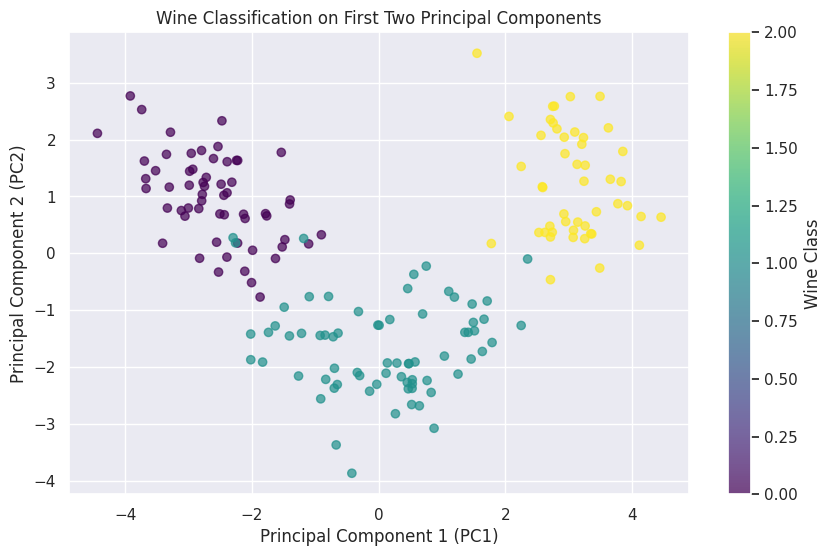

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA on the standardized data
pca = PCA(n_components=2)  # Only extract the first two principal components
principal_components = pca.fit_transform(X_standardized)

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0],
                       principal_components[:, 1],
                       c=y, cmap='viridis', alpha=0.7)

# Add labels and title
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("Wine Classification on First Two Principal Components")

# Create color bar for class differentiation
cbar = plt.colorbar(scatter)
cbar.set_label("Wine Class")

# Show the plot
plt.show()

The scatter plot shows that the three wine classes form distinct clusters, meaning PCA effectively captures the differences between them.

There is some overlap between certain classes, which suggests that some wine types have similar chemical compositions.

The fact that the first two principal components allow this level of separation means that these two dimensions retain most of the useful information from the original 13 features.

PCA reduces complexity while preserving meaningful distinctions, making it useful for classification tasks.

### Problem 6

**Dataset:** Life Expectancy

**Introduction:** The above dataset gives life expectancy related data for 37 countries in2014.

Consider only the following variables in your analysis: 'GDP', 'Income composition of resources', 'Schooling', and 'Total expenditure'.

In [ ]:
#Import useful package
from sklearn.manifold import MDS

#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Life Expectancy.csv")
df.head()

Saving Life Expectancy.csv to Life Expectancy.csv


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Australia,2014,Developed,82.7,6,1,9.71,10769.363050,91.0,340,...,92,9.42,92,0.1,62214.691200,2346694.0,0.6,0.6,0.936,20.4
2,Austria,2014,Developed,81.4,66,0,12.32,8350.193523,98.0,117,...,98,11.21,98,0.1,51322.639970,8541575.0,1.8,2.0,0.892,15.9
3,Bangladesh,2014,Developing,71.4,132,98,0.01,10.446403,97.0,289,...,97,2.82,97,0.1,184.565430,15945279.0,18.1,18.6,0.570,10.0
4,Belgium,2014,Developed,89.0,76,0,12.60,7163.348923,98.0,70,...,99,1.59,99,0.1,47439.396840,112957.0,1.0,1.0,0.890,16.3


**TODO1:**

* Standardize the numeric variables in the given data frame
* Run MDS() (Multi Dimensional Scaling) on the standardized data
* Plot data points on a 2D plane defined by the first two components
* Use color to differentiate the statues of each country with legend
* Use text label to specify the country name for each point
* Comment your findings from the graph

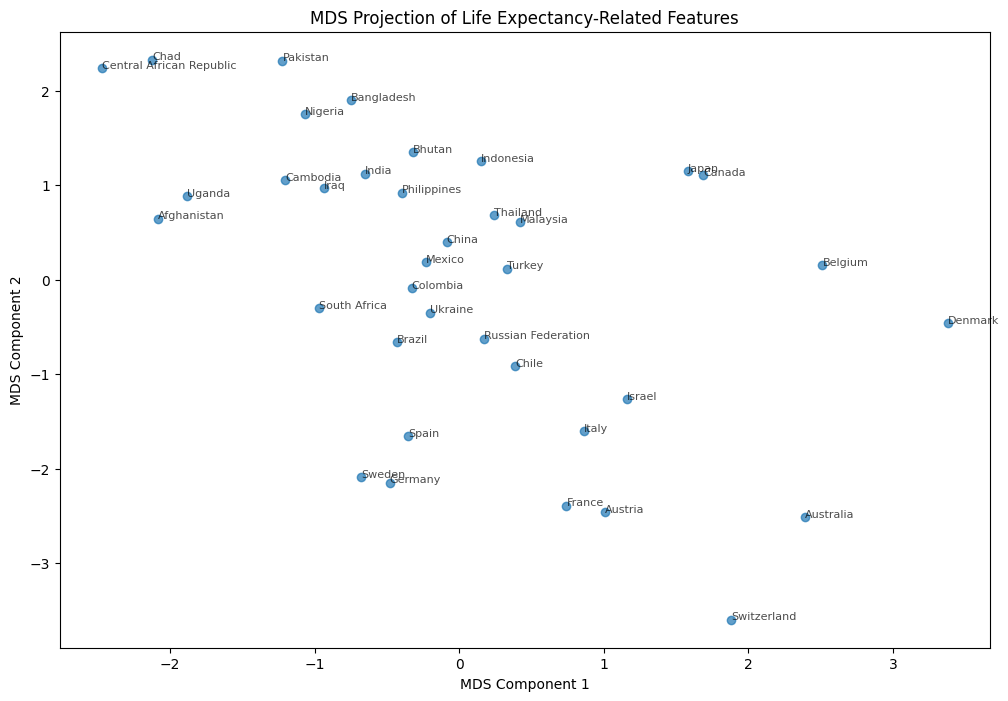

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

# Select relevant columns for analysis
selected_columns = ['GDP', 'Income composition of resources', 'Schooling', 'Total expenditure']
df_selected = df[selected_columns].dropna()  # Remove any missing values

# Standardize the numeric variables
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_selected)

# Run MDS on the standardized data
mds = MDS(n_components=2, random_state=42)
mds_transformed = mds.fit_transform(df_standardized)

# Load country names for labeling (ensure alignment)
df_selected['Country'] = df['Country'].dropna().values[:len(df_selected)]

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], alpha=0.7)

# Add country labels
for i, country in enumerate(df_selected['Country']):
    plt.text(mds_transformed[i, 0], mds_transformed[i, 1], country, fontsize=8, alpha=0.7)

# Labels and title
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("MDS Projection of Life Expectancy-Related Features")

# Show the plot
plt.show()

The graph suggests that countries with similar economic and educational profiles cluster together, while differences in GDP, education, and spending create clear separations.

### Problem 7

Dataset: Game of thrones Books

Introduction: Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series A Song of Ice and Fire by George R.R. Martin. You need to analyze the co-occurrence network of the characters in the Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books.

This dataset (5 files attached in zip file) constitutes a network and is given as a text file describing the edges between characters, with some attributes attached to each edge.

Loading the required libraries

In [1]:
!pip install pyvis
import pyvis
import networkx as nx
from pyvis.network import Network
!pip install decorator==5.0.9
!pip install --user networkx==2.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.0.9 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [1]:
import networkx as nx
from pyvis.network import Network
!pip install decorator==5.0.9
!pip install --user networkx==2.3

  Using cached networkx-2.3.zip (1.7 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1555995 sha256=d4630a558b2e7a63b92ab1abca88ac5b0411f250572e7efdcc47ffe6ac6ac18f
  Stored in directory: /root/.cache/pip/wheels/2c/37/e7/4605d8245bedc0a0450fc73e5a07e1d1696301f2f3ba10788c
Successfully built networkx
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.1 requires networkx>=3.0, but you have networkx 2.3 which is incompatible.
nx-cugraph-cu12 24.12.0 requires networkx>=3.2, but you have networkx 2.3 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [8]:
pip install networkx --force-reinstall --no-deps --upgrade --user


  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2


**TODO1:**

- Load data for the all the books of Game of Thrones (Merge all files into one and create a dataframe)
- Select only the rows which has weight more than 10

In [3]:
import pandas as pd
# List of book files
book_files = ['book1.csv', 'book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']

# Create an empty list to store individual DataFrames
dataframes = []

# Loop through each book file and load it into a DataFrame
for file in book_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Merge all DataFrames into one
merged_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the merged DataFrame
merged_df.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1.0
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1.0
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1.0
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1.0
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1.0


In [4]:
#Filter rows where weight > 10
filtered_df = merged_df[merged_df['weight'] > 10]

# Display the shape of the filtered DataFrame
print("Filtered DataFrame Shape:", filtered_df.shape)

# Display the first few rows of the filtered DataFrame
filtered_df.head()

Filtered DataFrame Shape: (747, 5)


,Source,Target,Type,weight,book
8,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,Undirected,13,1.0
9,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,34,1.0
16,Aerys-II-Targaryen,Robert-Baratheon,Undirected,12,1.0
17,Aggo,Daenerys-Targaryen,Undirected,11,1.0
30,Alliser-Thorne,Jon-Snow,Undirected,32,1.0


**TODO2:**
Load the dataframe as networkx graph

In [5]:
import networkx as nx
# Create an empty undirected graph
G = nx.Graph()

# Add edges to the graph from the filtered DataFrame
for _, row in filtered_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['weight'])

# Print basic information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 258
Number of edges: 557


Hint: [Network analysis in python](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html)

In [6]:
print("No of unique characters:", len(G.nodes))
print("No of connections:", len(G.edges))

No of unique characters: 258
No of connections: 557


**TODO3:**

Create viz network
Hint: [Use Pyvis](https://pyvis.readthedocs.io/en/latest/)

In [9]:
# Print the first few nodes
print("Nodes:", list(G.nodes)[:5])

# Print the first few edges with weights
print("Edges with weights:", list(G.edges(data=True))[:5])

Nodes: ['Aemon-Targaryen-(Maester-Aemon)', 'Jeor-Mormont', 'Jon-Snow', 'Aerys-II-Targaryen', 'Robert-Baratheon']
Edges with weights: [('Aemon-Targaryen-(Maester-Aemon)', 'Jeor-Mormont', {'width': 1}), ('Aemon-Targaryen-(Maester-Aemon)', 'Jon-Snow', {'width': 1}), ('Aemon-Targaryen-(Maester-Aemon)', 'Clydas', {'width': 1}), ('Aemon-Targaryen-(Maester-Aemon)', 'Donal-Noye', {'width': 1}), ('Aemon-Targaryen-(Maester-Aemon)', 'Samwell-Tarly', {'width': 1})]


In [14]:
from pyvis.network import Network
import webbrowser
# Create a PyVis network
net = Network(notebook=True, height="500px", width="100%",cdn_resources='in_line')

# Add nodes and edges from the NetworkX graph
net.from_nx(G)

# Show the interactive graph
net.show("got_network.html")
# Provide a download link (for Google Colab or Jupyter Notebook)

from google.colab import files
files.download("got_network.html")  # For Google Colab

got_network.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>